In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#Load Data
df = pd.read_csv('../data/BrentOilPrices.csv')
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [4]:
#Statistical Description
df.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [5]:
#Change the date datatype
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

C:\Users\Wasihun\AppData\Local\Temp\ipykernel_14652\2985078730.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [6]:
#Check for the sample date
df['Date'].head()

0   1987-05-20
1   1987-05-21
2   1987-05-22
3   1987-05-25
4   1987-05-26
Name: Date, dtype: datetime64[ns]

In [7]:
#Check for missing Values
df.isnull().sum()

Date     0
Price    0
dtype: int64

Text(0, 0.5, 'Count')

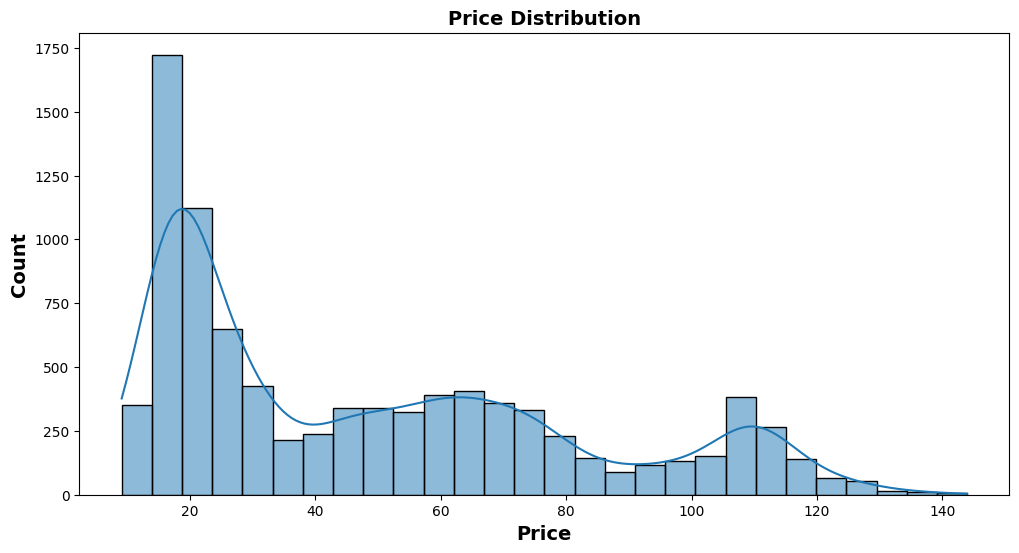

In [8]:
#Check for distribution of 'Price'
fig,axis = plt.subplots(figsize=(12,6))
sns.histplot(df['Price'], kde=True, ax=axis)
plt.title('Price Distribution',fontsize=14, fontweight="bold")
plt.xlabel('Price',fontsize=14, fontweight="bold")
plt.ylabel('Count',fontsize=14, fontweight="bold")


In [9]:
#Set 'Date' as the Index
df.set_index('Date', inplace=True)

In [10]:
#Since the is needed to be in chronological order let's resample it by business day.
df = df.asfreq('b', method='ffill')

Text(0, 0.5, 'Price')

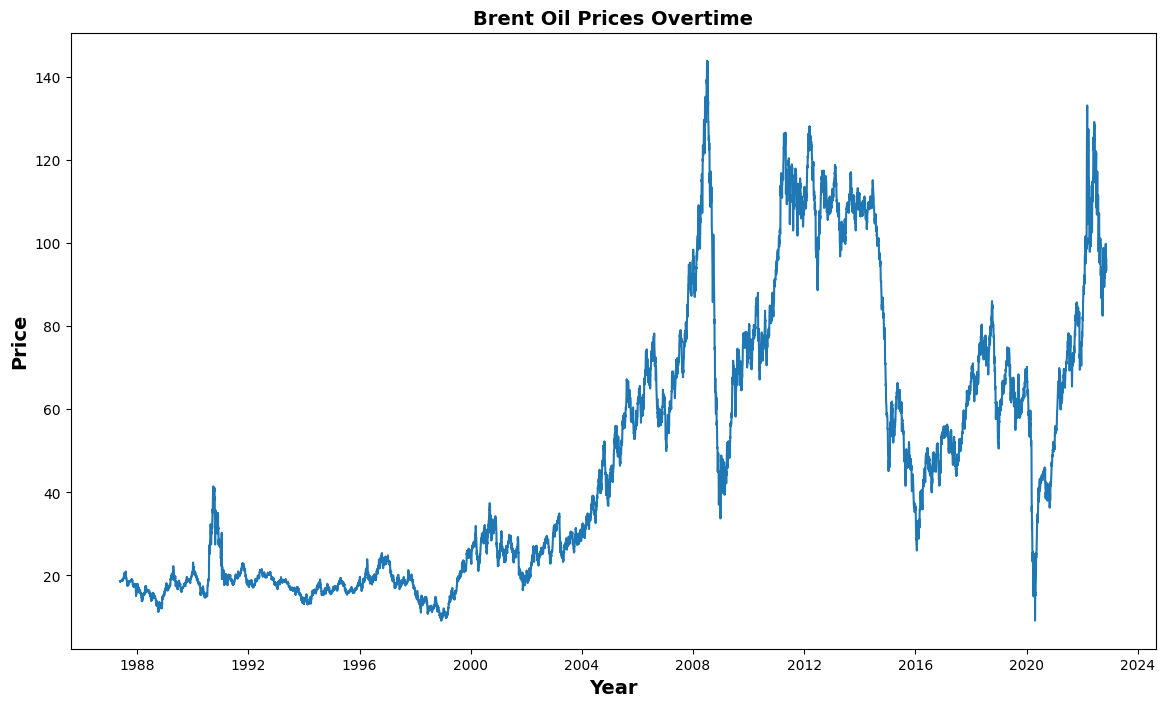

In [23]:
#Plot the 'Price' against the 'Date'
fig = plt.subplots(figsize=(14,8))
plt.plot(df['Price']) 
plt.title('Brent Oil Prices Overtime',fontsize=14, fontweight="bold")
plt.xlabel('Year',fontsize=14, fontweight="bold")
plt.ylabel('Price',fontsize=14, fontweight="bold")

In [ ]:
#Check for Stationarity
result = adfuller(df['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print(f'Data is stationary')
else:
    print(f'Data is non-stationary')

ADF Statistic: -2.0239950997432996
p-value: 0.27615218510488515
Data is non-stationary


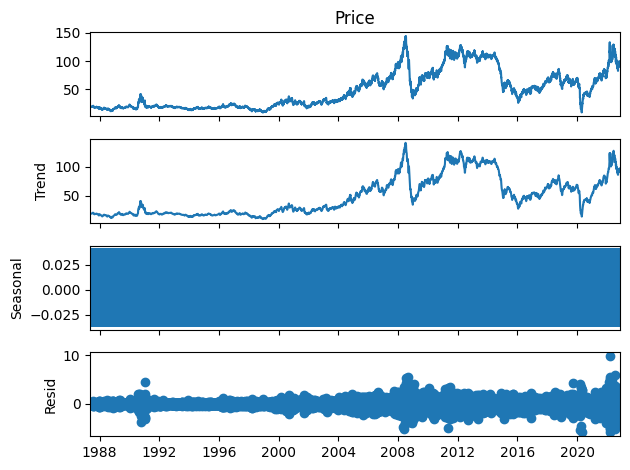

In [ ]:
#Check for Seasonality
result = seasonal_decompose(df['Price'], model='additive')
result.plot()
plt.show()

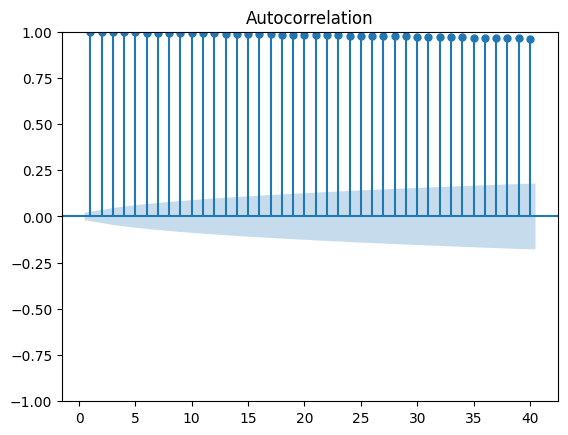

In [ ]:
#ACF
plot_acf(df['Price'], lags=40, zero=False)
plt.show()

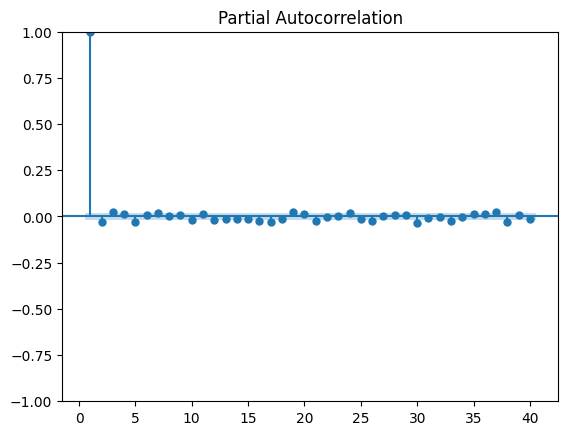

In [15]:
#PACF
plot_pacf(df['Price'], lags=40, zero=False)
plt.show()